IS602--Assignment-10--James Hamski

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import pandas as pd
import numpy as np
matplotlib.style.use('ggplot')

Express the cars.data.csv data as a series of bar graphs.  The x-axis represents a feature and the y-axis is the frequency in the sample.  Do this with the 'buying', 'maint', 'safety', and 'doors' fields with one plot for each for a total of four. 

In [9]:
column_names = ["maint", "doors", "persons", "lug_boot", "safety", "acceptability"]
cars = pd.read_csv('cars.data.csv', header=None, names=column_names)
print cars

       maint  doors persons lug_boot safety acceptability
vhigh  vhigh      2       2    small    low         unacc
vhigh  vhigh      2       2    small    med         unacc
vhigh  vhigh      2       2    small   high         unacc
vhigh  vhigh      2       2      med    low         unacc
vhigh  vhigh      2       2      med    med         unacc
vhigh  vhigh      2       2      med   high         unacc
vhigh  vhigh      2       2      big    low         unacc
vhigh  vhigh      2       2      big    med         unacc
vhigh  vhigh      2       2      big   high         unacc
vhigh  vhigh      2       4    small    low         unacc
vhigh  vhigh      2       4    small    med         unacc
vhigh  vhigh      2       4    small   high         unacc
vhigh  vhigh      2       4      med    low         unacc
vhigh  vhigh      2       4      med    med         unacc
vhigh  vhigh      2       4      med   high         unacc
vhigh  vhigh      2       4      big    low         unacc
vhigh  vhigh  

In [10]:
doors = cars['doors'].value_counts()
print doors

3        432
5more    432
4        432
2        432
Name: doors, dtype: int64


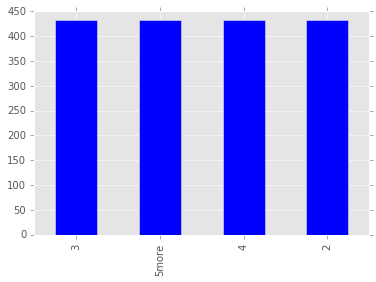

In [7]:
doors.plot.bar()

Plot your results from the linear regression in homework 5 and 7 (for any of the provided data sets).  The plot should include.  1) a scatter of the points in the .csv file 2) a line showing the regression line (either from the calculation in homework 5 or line-fitting from homework 7).  3) something on the plot that specifies the equation for the regression line. 

Create an overlay of the center points found in objects.png from homework 8.  The image should be in the background and the object centers can be small circles or points at or around the center points. 

Plot a line graph that shows the hour by hour change in number of server requests from the HTTP in homework 9.  The x-axis is the discrete hour intervals (e.g. 13:00 – 14:00) and the y-axis is the number of requests.